In [100]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:

# data
hotel_df = pd.read_csv("/Users/danielle/hotel_performance_analysis/data/hotel_df.csv")

In [102]:
# check df shape and structure
print(hotel_df.shape)
print(hotel_df.info())

(5491, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HTL_CD          5491 non-null   object 
 1   STY_DT          5491 non-null   object 
 2   CURR_CD         5491 non-null   object 
 3   RM_NTS          5491 non-null   int64  
 4   RM_REV_AMT_LOC  5491 non-null   float64
 5   REGION          5491 non-null   object 
 6   COUNTRY         5491 non-null   object 
 7   RMS_AVAIL       5491 non-null   int64  
 8   EXCH_RATE_AMT   5491 non-null   float64
 9   CAL_DOW         5491 non-null   int64  
 10  CONVERTED_REV   5491 non-null   float64
 11  OCCUPANCY       5491 non-null   float64
 12  ADR             5491 non-null   float64
 13  REV_PAR         5491 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 600.7+ KB
None


In [103]:
# df column descriptions
print(hotel_df.describe())

            RM_NTS  RM_REV_AMT_LOC    RMS_AVAIL  EXCH_RATE_AMT      CAL_DOW  \
count  5491.000000    5.491000e+03  5491.000000    5491.000000  5491.000000   
mean    263.603533    2.765036e+05   451.381169      11.467948     3.999636   
std     221.086342    4.877422e+05   282.838801      18.429075     1.996445   
min       4.000000    3.115500e+02    68.000000       0.744791     1.000000   
25%      74.000000    8.071820e+03   335.000000       1.000000     2.000000   
50%     238.000000    6.889050e+04   348.000000       1.000000     4.000000   
75%     346.000000    2.593600e+05   600.000000       6.541252     6.000000   
max     918.000000    3.319752e+06   906.000000      48.068047     7.000000   

       CONVERTED_REV    OCCUPANCY          ADR      REV_PAR  
count   5.491000e+03  5491.000000  5491.000000  5491.000000  
mean    3.861585e+04    60.256855   147.074819    94.651618  
std     7.656780e+04    29.935809   222.972931   213.416262  
min     3.115500e+02     2.388060    31.

HTL_CD
EXIUS     68.0
GCBJN    600.0
ICWAS    335.0
PHEGA    348.0
UKPIL    906.0
Name: RMS_AVAIL, dtype: float64


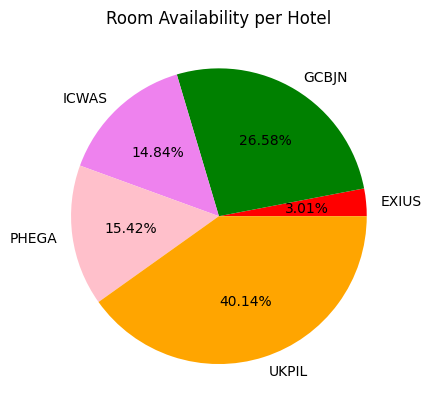

In [104]:
rooms_available = hotel_df.groupby('HTL_CD')['RMS_AVAIL'].mean().round()

hotel_codes = ['EXIUS', 'GCBJN', 'ICWAS', 'PHEGA', 'UKPIL']

print(rooms_available)
plt.pie(rooms_available,
        labels = hotel_codes,
        # show percentage with two decimal points
        autopct='%1.2f%%',
        colors = ['red', 'green', 'violet', 'pink', 'orange' ])
plt.title(label = "Room Availability per Hotel")
plt.show()

In [105]:
# check what hotels are in the dataset
hotel_df.HTL_CD.unique()

array(['EXIUS', 'GCBJN', 'ICWAS', 'PHEGA', 'UKPIL'], dtype=object)

In [106]:
# Add new YEAR / MONTH and YEAR-MONTH columns for aggregating purposes
hotel_df['STY_DT'] = pd.to_datetime(hotel_df['STY_DT'])
hotel_df['YEAR'] = hotel_df['STY_DT'].dt.year
hotel_df['MONTH'] = hotel_df['STY_DT'].dt.strftime('%m')

hotel_df['YEAR_MONTH'] = hotel_df['YEAR'].astype(str) + "-" + hotel_df['MONTH'].astype(str)

In [107]:
# define columns
num_columns = ['RM_REV_AMT_LOC', 'OCCUPANCY', 'ADR','REV_PAR', 'CONVERTED_REV', 'Converted_revenue_to_USD']

# iterate through the columns of the DataFrame
for column in hotel_df.columns:
    # check if the column is in the list of monetary columns
    if column in num_columns:
        # round the values in the column to 2 decimal places
        hotel_df[column] = hotel_df[column].round(2)

In [108]:
# create separate df for each hotel

# hotel codes
hotel_codes = ['EXIUS', 'GCBJN', 'ICWAS', 'PHEGA', 'UKPIL']

# iterate over each hotel code
for hotel_code in hotel_codes:
    # filter the df for each hotel code
    hotel_data = hotel_df[hotel_df['HTL_CD'] == hotel_code]
    
    # define the filename for the CSV file based on the hotel code
    filename = f'/Users/danielle/hotel_performance_analysis/data/hotel_{hotel_code}_data.csv'
    
    # Write the filtered DataFrame to a CSV file
    hotel_data.to_csv(filename, index=False)

In [109]:
# read each hotel data csv file

exius_data = pd.read_csv("/Users/danielle/hotel_performance_analysis/data/hotel_EXIUS_data.csv")
gcbjn_data = pd.read_csv("/Users/danielle/hotel_performance_analysis/data/hotel_GCBJN_data.csv")
icwas_data = pd.read_csv("/Users/danielle/hotel_performance_analysis/data/hotel_ICWAS_data.csv")
phega_data = pd.read_csv("/Users/danielle/hotel_performance_analysis/data/hotel_PHEGA_data.csv")
ukpil_data = pd.read_csv("/Users/danielle/hotel_performance_analysis/data/hotel_UKPIL_data.csv")

In [110]:
exius_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,CONVERTED_REV,OCCUPANCY,ADR,REV_PAR,YEAR,MONTH,YEAR_MONTH
0,EXIUS,2019-01-01 00:00:00+00:00,USD,13,1614.09,AMERICAS,UNITED STATES,68,1.0,3,1614.09,19.12,124.16,23.74,2019,1,2019-01
1,EXIUS,2019-01-02 00:00:00+00:00,USD,32,3798.64,AMERICAS,UNITED STATES,68,1.0,4,3798.64,47.06,118.71,55.86,2019,1,2019-01
2,EXIUS,2019-01-03 00:00:00+00:00,USD,27,3001.06,AMERICAS,UNITED STATES,68,1.0,5,3001.06,39.71,111.15,44.13,2019,1,2019-01
3,EXIUS,2019-01-04 00:00:00+00:00,USD,21,2408.18,AMERICAS,UNITED STATES,68,1.0,6,2408.18,30.88,114.68,35.41,2019,1,2019-01
4,EXIUS,2019-01-05 00:00:00+00:00,USD,25,2832.58,AMERICAS,UNITED STATES,68,1.0,7,2832.58,36.76,113.30,41.66,2019,1,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,EXIUS,2021-12-27 00:00:00+00:00,USD,46,5342.95,AMERICAS,UNITED STATES,68,1.0,2,5342.95,67.65,116.15,78.57,2021,12,2021-12
1094,EXIUS,2021-12-28 00:00:00+00:00,USD,33,3992.78,AMERICAS,UNITED STATES,68,1.0,3,3992.78,48.53,120.99,58.72,2021,12,2021-12
1095,EXIUS,2021-12-29 00:00:00+00:00,USD,37,4388.74,AMERICAS,UNITED STATES,68,1.0,4,4388.74,54.41,118.61,64.54,2021,12,2021-12
1096,EXIUS,2021-12-30 00:00:00+00:00,USD,35,4116.44,AMERICAS,UNITED STATES,68,1.0,5,4116.44,51.47,117.61,60.54,2021,12,2021-12


In [111]:
gcbjn_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,CONVERTED_REV,OCCUPANCY,ADR,REV_PAR,YEAR,MONTH,YEAR_MONTH
0,GCBJN,2019-01-01 00:00:00+00:00,CNY,283,128390.15,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,3,19627.76,47.17,69.36,32.71,2019,1,2019-01
1,GCBJN,2019-01-02 00:00:00+00:00,CNY,293,149840.91,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,4,22907.07,48.83,78.18,38.18,2019,1,2019-01
2,GCBJN,2019-01-03 00:00:00+00:00,CNY,372,196829.18,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,5,30090.44,62.00,80.89,50.15,2019,1,2019-01
3,GCBJN,2019-01-04 00:00:00+00:00,CNY,473,260086.82,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,6,39761.02,78.83,84.06,66.27,2019,1,2019-01
4,GCBJN,2019-01-05 00:00:00+00:00,CNY,438,244708.67,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,7,37410.07,73.00,85.41,62.35,2019,1,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,GCBJN,2021-12-27 00:00:00+00:00,CNY,206,90956.40,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,2,13905.04,34.33,67.50,23.18,2021,12,2021-12
1094,GCBJN,2021-12-28 00:00:00+00:00,CNY,241,106691.87,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,3,16310.62,40.17,67.68,27.18,2021,12,2021-12
1095,GCBJN,2021-12-29 00:00:00+00:00,CNY,242,108876.21,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,4,16644.55,40.33,68.78,27.74,2021,12,2021-12
1096,GCBJN,2021-12-30 00:00:00+00:00,CNY,266,115828.85,GREATER CHINA,CHINA-PEOPLES REPUBLIC,600,6.541252,5,17707.44,44.33,66.57,29.51,2021,12,2021-12


In [112]:
icwas_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,CONVERTED_REV,OCCUPANCY,ADR,REV_PAR,YEAR,MONTH,YEAR_MONTH
0,ICWAS,2019-01-01 00:00:00+00:00,USD,136,33792.92,AMERICAS,UNITED STATES,335,1.0,3,33792.92,40.60,248.48,100.87,2019,1,2019-01
1,ICWAS,2019-01-02 00:00:00+00:00,USD,205,53169.28,AMERICAS,UNITED STATES,335,1.0,4,53169.28,61.19,259.36,158.71,2019,1,2019-01
2,ICWAS,2019-01-03 00:00:00+00:00,USD,207,51683.90,AMERICAS,UNITED STATES,335,1.0,5,51683.90,61.79,249.68,154.28,2019,1,2019-01
3,ICWAS,2019-01-04 00:00:00+00:00,USD,154,37569.35,AMERICAS,UNITED STATES,335,1.0,6,37569.35,45.97,243.96,112.15,2019,1,2019-01
4,ICWAS,2019-01-05 00:00:00+00:00,USD,137,32723.77,AMERICAS,UNITED STATES,335,1.0,7,32723.77,40.90,238.86,97.68,2019,1,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,ICWAS,2021-12-27 00:00:00+00:00,USD,151,50578.93,AMERICAS,UNITED STATES,335,1.0,2,50578.93,45.07,334.96,150.98,2021,12,2021-12
1094,ICWAS,2021-12-28 00:00:00+00:00,USD,171,60110.47,AMERICAS,UNITED STATES,335,1.0,3,60110.47,51.04,351.52,179.43,2021,12,2021-12
1095,ICWAS,2021-12-29 00:00:00+00:00,USD,167,57753.91,AMERICAS,UNITED STATES,335,1.0,4,57753.91,49.85,345.83,172.40,2021,12,2021-12
1096,ICWAS,2021-12-30 00:00:00+00:00,USD,99,43369.69,AMERICAS,UNITED STATES,335,1.0,5,43369.69,29.55,438.08,129.46,2021,12,2021-12


In [113]:
phega_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,CONVERTED_REV,OCCUPANCY,ADR,REV_PAR,YEAR,MONTH,YEAR_MONTH
0,PHEGA,2019-01-01 00:00:00+00:00,PHP,196,1175982.03,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,3,24464.94,56.32,124.82,70.30,2019,1,2019-01
1,PHEGA,2019-01-02 00:00:00+00:00,PHP,168,967607.07,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,4,20129.94,48.28,119.82,57.84,2019,1,2019-01
2,PHEGA,2019-01-03 00:00:00+00:00,PHP,167,942676.74,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,5,19611.30,47.99,117.43,56.35,2019,1,2019-01
3,PHEGA,2019-01-04 00:00:00+00:00,PHP,158,831695.84,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,6,17302.47,45.40,109.51,49.72,2019,1,2019-01
4,PHEGA,2019-01-05 00:00:00+00:00,PHP,191,948210.42,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,7,19726.42,54.89,103.28,56.69,2019,1,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,PHEGA,2021-12-27 00:00:00+00:00,PHP,281,776252.87,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,2,16149.04,80.75,57.47,46.41,2021,12,2021-12
1095,PHEGA,2021-12-28 00:00:00+00:00,PHP,308,835530.44,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,3,17382.24,88.51,56.44,49.95,2021,12,2021-12
1096,PHEGA,2021-12-29 00:00:00+00:00,PHP,311,875963.99,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,4,18223.42,89.37,58.60,52.37,2021,12,2021-12
1097,PHEGA,2021-12-30 00:00:00+00:00,PHP,309,927796.13,"EUROPE, MIDDLE EAST, ASIA & AFRICA",PHILIPPINES,348,48.068047,5,19301.72,88.79,62.47,55.46,2021,12,2021-12


In [114]:
ukpil_data

,HTL_CD,STY_DT,CURR_CD,RM_NTS,RM_REV_AMT_LOC,REGION,COUNTRY,RMS_AVAIL,EXCH_RATE_AMT,CAL_DOW,CONVERTED_REV,OCCUPANCY,ADR,REV_PAR,YEAR,MONTH,YEAR_MONTH
0,UKPIL,2019-01-01 00:00:00+00:00,GBP,853,95246.41,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,3,127883.40,94.15,149.92,141.15,2019,1,2019-01
1,UKPIL,2019-01-02 00:00:00+00:00,GBP,900,91036.51,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,4,122230.95,99.34,135.81,134.91,2019,1,2019-01
2,UKPIL,2019-01-03 00:00:00+00:00,GBP,841,83663.87,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,5,112332.01,92.83,133.57,123.99,2019,1,2019-01
3,UKPIL,2019-01-04 00:00:00+00:00,GBP,677,67525.91,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,6,90664.24,74.72,133.92,100.07,2019,1,2019-01
4,UKPIL,2019-01-05 00:00:00+00:00,GBP,697,70125.75,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,7,94154.94,76.93,135.09,103.92,2019,1,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,UKPIL,2021-12-27 00:00:00+00:00,GBP,408,33655.82,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,2,45188.27,45.03,110.76,49.88,2021,12,2021-12
1094,UKPIL,2021-12-28 00:00:00+00:00,GBP,433,36379.99,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,3,48845.91,47.79,112.81,53.91,2021,12,2021-12
1095,UKPIL,2021-12-29 00:00:00+00:00,GBP,439,36752.02,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,4,49345.41,48.45,112.40,54.47,2021,12,2021-12
1096,UKPIL,2021-12-30 00:00:00+00:00,GBP,425,35784.39,"EUROPE, MIDDLE EAST, ASIA & AFRICA",UNITED KINGDOM,906,0.744791,5,48046.22,46.91,113.05,53.03,2021,12,2021-12


# High-level Analysis

In [115]:
#Average Daily Rate per hotel
print(f"EXIUS Average Daily Rate : {exius_data['ADR'].mean().round(2)}")
print(f"GCBJN Average Daily Rate : {gcbjn_data['ADR'].mean().round(2)}")
print(f"ICWAS Average Daily Rate : {icwas_data['ADR'].mean().round(2)}")
print(f"PHEGA Average Daily Rate : {phega_data['ADR'].mean().round(2)}")
print(f"UKPIL Average Daily Rate : {ukpil_data['ADR'].mean().round(2)}")

EXIUS Average Daily Rate : 121.25
GCBJN Average Daily Rate : 79.81
ICWAS Average Daily Rate : 342.91
PHEGA Average Daily Rate : 81.32
UKPIL Average Daily Rate : 110.14


In [116]:
# Average Revenue per Available Room per hotel
print(f"EXIUS Average Revenue per Available Room: {exius_data['REV_PAR'].mean().round(2)}")
print(f"GCBJN Average Revenue per Available Room: {gcbjn_data['REV_PAR'].mean().round(2)}")
print(f"ICWAS Average Revenue per Available Room: {icwas_data['REV_PAR'].mean().round(2)}")
print(f"PHEGA Average Revenue per Available Room: {phega_data['REV_PAR'].mean().round(2)}")
print(f"UKPIL Average Revenue per Available Room: {ukpil_data['REV_PAR'].mean().round(2)}")

EXIUS Average Revenue per Available Room: 68.9
GCBJN Average Revenue per Available Room: 50.05
ICWAS Average Revenue per Available Room: 220.93
PHEGA Average Revenue per Available Room: 65.41
UKPIL Average Revenue per Available Room: 68.0


In [117]:
#Average Occupancy Rate per hotel
print(f"EXIUS Average Occupancy Rate: {exius_data['OCCUPANCY'].mean().round(2)} %")
print(f"GCBJN Average Occupancy Rate: {gcbjn_data['OCCUPANCY'].mean().round(2)} %")
print(f"ICWAS Average Occupancy Rate: {icwas_data['OCCUPANCY'].mean().round(2)} %")
print(f"PHEGA Average Occupancy Rate: {phega_data['OCCUPANCY'].mean().round(2)} %")
print(f"UKPIL Average Occupancy Rate: {ukpil_data['OCCUPANCY'].mean().round(2)} %")


EXIUS Average Occupancy Rate: 55.78 %
GCBJN Average Occupancy Rate: 58.89 %
ICWAS Average Occupancy Rate: 54.5 %
PHEGA Average Occupancy Rate: 81.12 %
UKPIL Average Occupancy Rate: 50.98 %


In [118]:
#Total Revenue per hotel
print(f"EXIUS Total Revenue: {exius_data['CONVERTED_REV'].sum().round(2)}")
print(f"GCBJN Total Revenue: {gcbjn_data['CONVERTED_REV'].sum().round(2)}")
print(f"ICWAS Total Revenue: {icwas_data['CONVERTED_REV'].sum().round(2)}")
print(f"PHEGA Total Revenue: {phega_data['CONVERTED_REV'].sum().round(2)}")
print(f"UKPIL Total Revenue: {ukpil_data['CONVERTED_REV'].sum().round(2)}")

EXIUS Total Revenue: 5144409.05
GCBJN Total Revenue: 32974506.84
ICWAS Total Revenue: 81264357.09
PHEGA Total Revenue: 25014854.47
UKPIL Total Revenue: 67641518.94


In [119]:
print(icwas_rev.iloc[2])

YEAR_MONTH          2019-03
CONVERTED_REV    3293435.87
Name: 2, dtype: object


In [120]:
yearly_revenue = hotel_df.groupby(['HTL_CD','YEAR'])['ADR'].sum().reset_index(name='CONVERTED_REV')

print(yearly_revenue)

   HTL_CD  YEAR  CONVERTED_REV
0   EXIUS  2019       45018.93
1   EXIUS  2020       42868.16
2   EXIUS  2021       45246.11
3   GCBJN  2019       35889.09
4   GCBJN  2020       27106.66
5   GCBJN  2021       24640.86
6   ICWAS  2019      182869.60
7   ICWAS  2020       89085.48
8   ICWAS  2021      104557.74
9   PHEGA  2019       47387.59
10  PHEGA  2020       25649.42
11  PHEGA  2021       16329.59
12  UKPIL  2019       56261.55
13  UKPIL  2020       32247.29
14  UKPIL  2021       32429.83


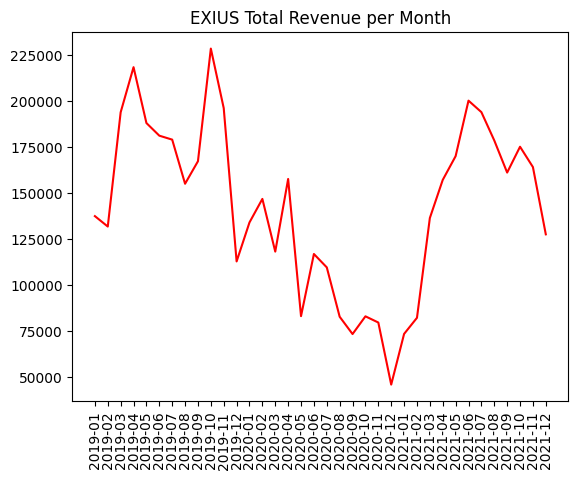

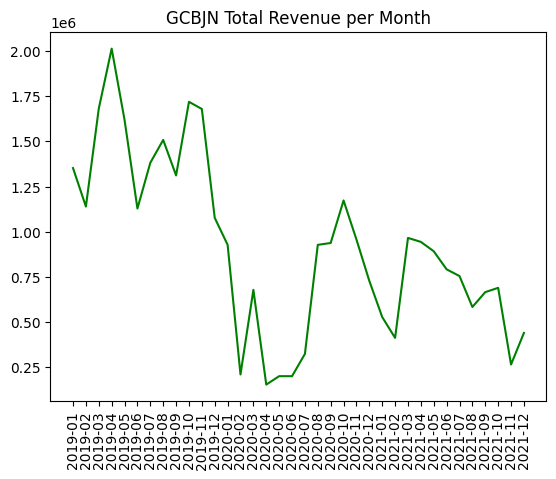

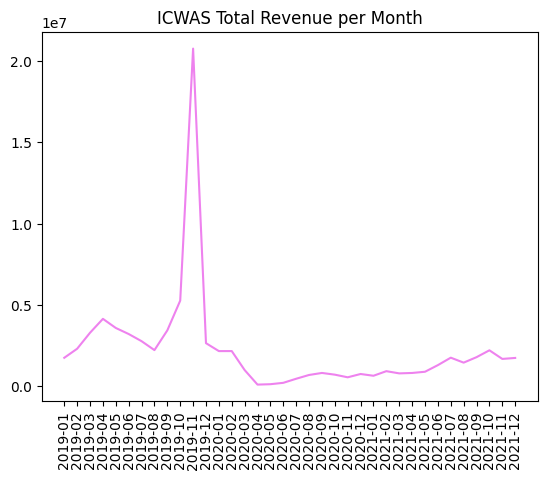

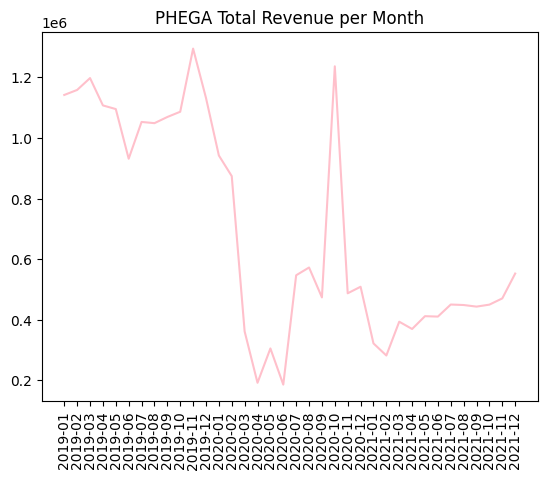

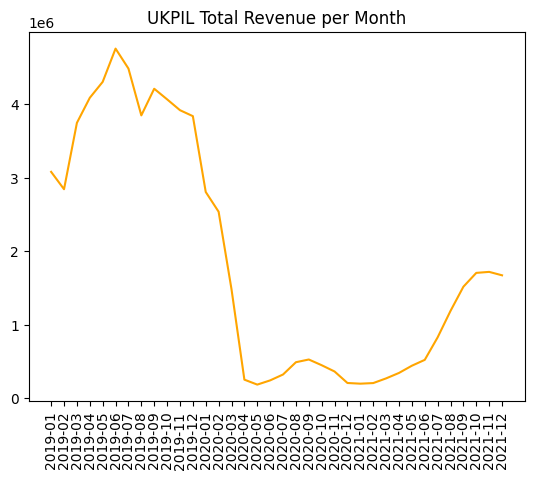

In [121]:
exius_rev = exius_data.groupby('YEAR_MONTH')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')
gcbjn_rev = gcbjn_data.groupby('YEAR_MONTH')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')
icwas_rev = icwas_data.groupby('YEAR_MONTH')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')
phega_rev = phega_data.groupby('YEAR_MONTH')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')
ukpil_rev = ukpil_data.groupby('YEAR_MONTH')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')

plt.plot(exius_rev['YEAR_MONTH'], exius_rev['CONVERTED_REV'], "red")
plt.xticks(rotation=90)
plt.title("EXIUS Total Revenue per Month")
plt.show()

plt.plot(gcbjn_rev['YEAR_MONTH'], gcbjn_rev['CONVERTED_REV'], "green")
plt.xticks(rotation=90)
plt.title("GCBJN Total Revenue per Month")
plt.show()

plt.plot(icwas_rev['YEAR_MONTH'], icwas_rev['CONVERTED_REV'], "violet")
plt.xticks(rotation=90)
plt.title("ICWAS Total Revenue per Month")
plt.show()


plt.plot(phega_rev['YEAR_MONTH'], phega_rev['CONVERTED_REV'], "pink")
plt.xticks(rotation=90)
plt.title("PHEGA Total Revenue per Month")
plt.show()

plt.plot(ukpil_rev['YEAR_MONTH'], ukpil_rev['CONVERTED_REV'], "orange")
plt.xticks(rotation=90)
plt.title("UKPIL Total Revenue per Month")
plt.show()

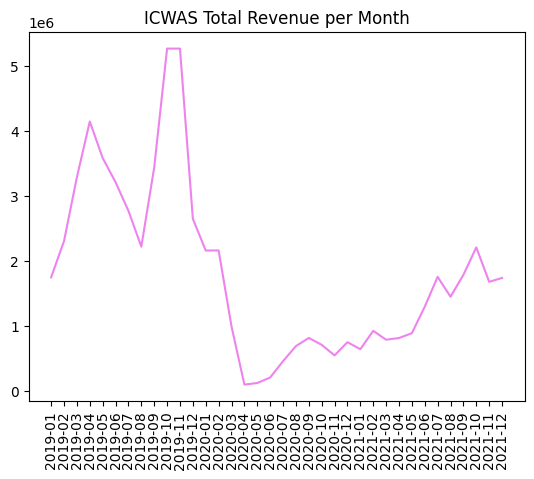

In [122]:
#Seeing an outlying data point from ICWAS Total Revenue per month, we will normalize the outlier by lag.

icwas_rev = icwas_data.groupby('YEAR_MONTH')['CONVERTED_REV'].sum().reset_index(name='CONVERTED_REV')
mean = icwas_data['CONVERTED_REV'].mean()

icwas_rev.loc[10, 'CONVERTED_REV'] = icwas_rev.loc[9, 'CONVERTED_REV']

plt.plot(icwas_rev['YEAR_MONTH'], icwas_rev['CONVERTED_REV'], "violet")
plt.xticks(rotation=90)
plt.title("ICWAS Total Revenue per Month")
plt.show()


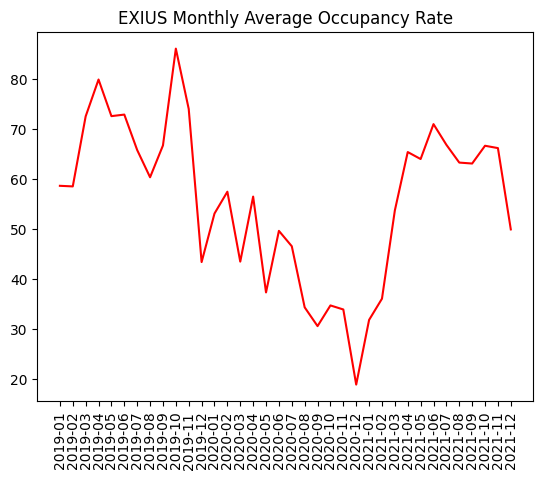

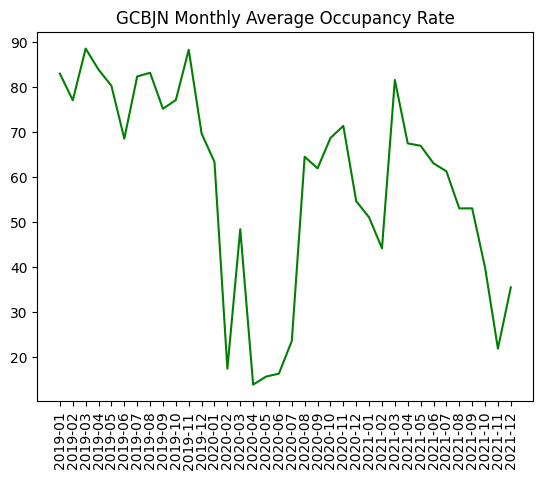

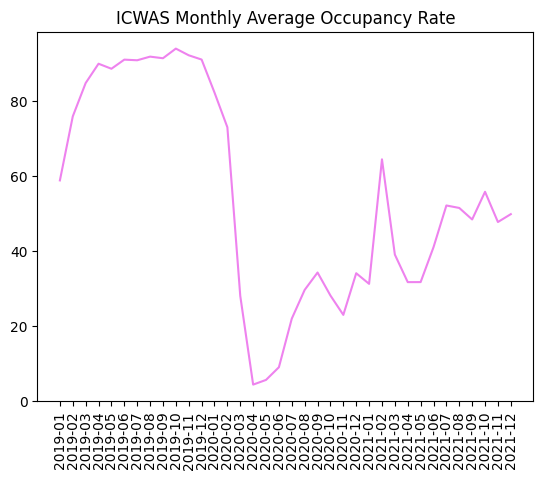

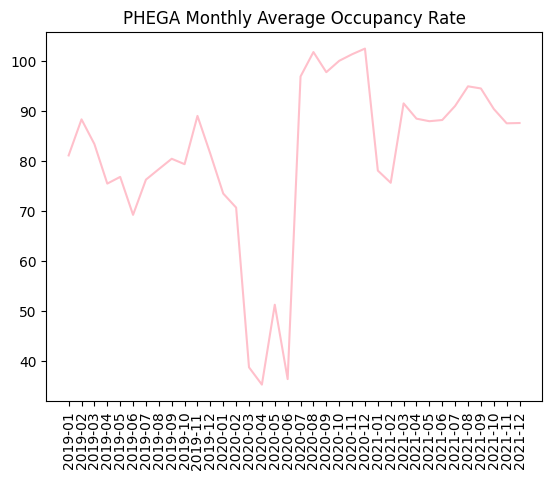

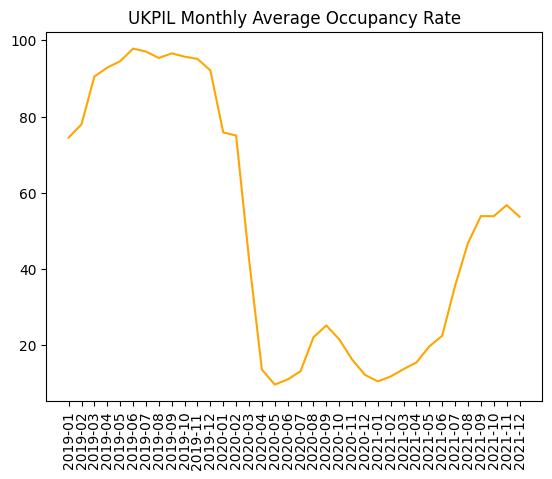

In [123]:
exius_occ = exius_data.groupby('YEAR_MONTH')['OCCUPANCY'].mean().reset_index(name='OCCUPANCY').round(2)
gcbjn_occ = gcbjn_data.groupby('YEAR_MONTH')['OCCUPANCY'].mean().reset_index(name='OCCUPANCY').round(2)
icwas_occ = icwas_data.groupby('YEAR_MONTH')['OCCUPANCY'].mean().reset_index(name='OCCUPANCY').round(2)
phega_occ = phega_data.groupby('YEAR_MONTH')['OCCUPANCY'].mean().reset_index(name='OCCUPANCY').round(2)
ukpil_occ = ukpil_data.groupby('YEAR_MONTH')['OCCUPANCY'].mean().reset_index(name='OCCUPANCY').round(2)

plt.plot(exius_occ['YEAR_MONTH'], exius_occ['OCCUPANCY'], "red")
plt.xticks(rotation=90)
plt.title("EXIUS Monthly Average Occupancy Rate")
plt.show()

plt.plot(gcbjn_occ['YEAR_MONTH'], gcbjn_occ['OCCUPANCY'], "green")
plt.xticks(rotation=90)
plt.title("GCBJN Monthly Average Occupancy Rate")
plt.show()

plt.plot(icwas_occ['YEAR_MONTH'], icwas_occ['OCCUPANCY'], "violet")
plt.xticks(rotation=90)
plt.title("ICWAS Monthly Average Occupancy Rate")
plt.show()


plt.plot(phega_occ['YEAR_MONTH'], phega_occ['OCCUPANCY'], "pink")
plt.xticks(rotation=90)
plt.title("PHEGA Monthly Average Occupancy Rate")
plt.show()

plt.plot(ukpil_occ['YEAR_MONTH'], ukpil_occ['OCCUPANCY'], "orange")
plt.xticks(rotation=90)
plt.title("UKPIL Monthly Average Occupancy Rate")
plt.show()


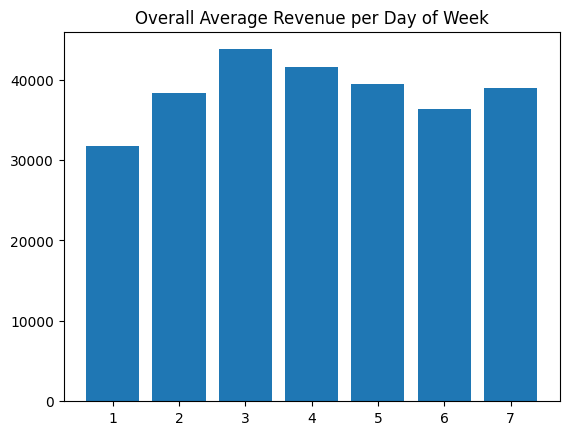

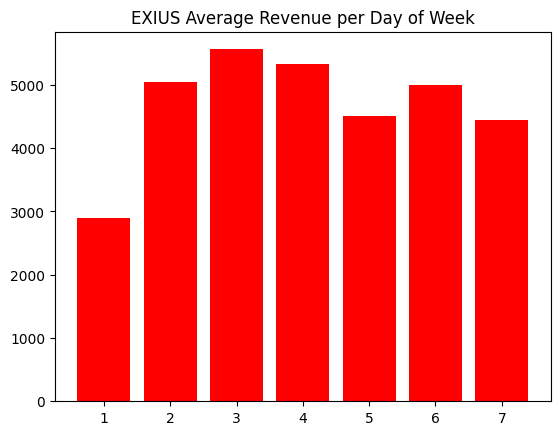

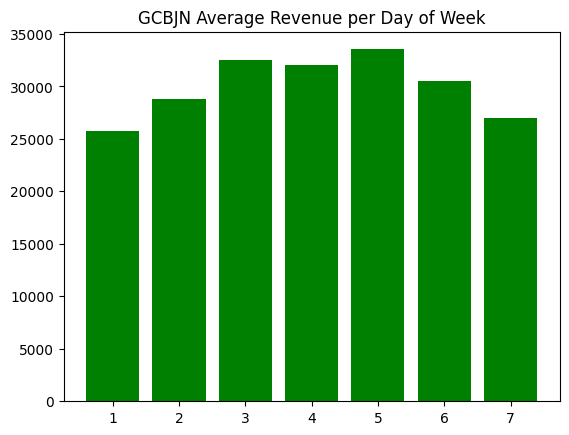

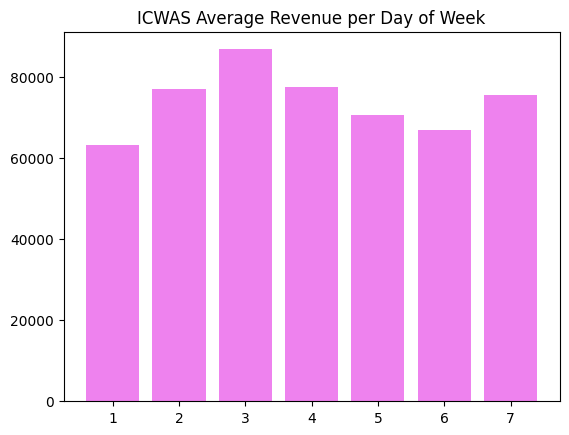

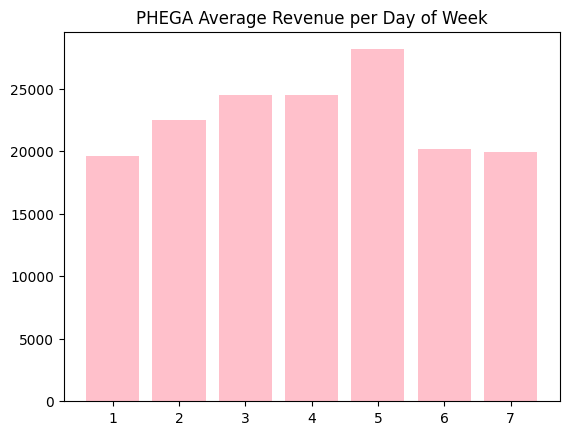

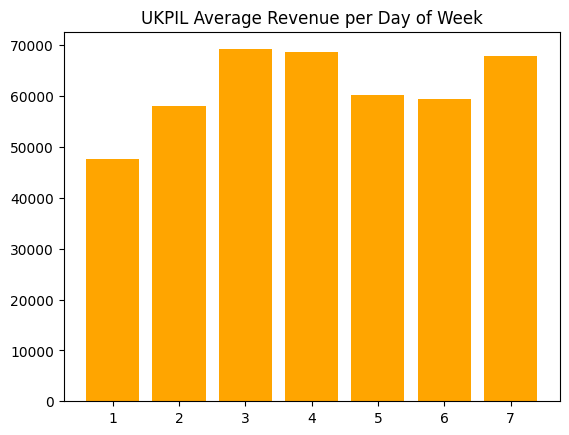

In [124]:
day_of_week_ave_total = hotel_df.groupby('CAL_DOW')['CONVERTED_REV'].mean().round(2).reset_index(name='CONVERTED_REV')
day_of_week_ave_exius = exius_data.groupby('CAL_DOW')['CONVERTED_REV'].mean().round(2).reset_index(name='CONVERTED_REV')
day_of_week_ave_gcbjn = gcbjn_data.groupby('CAL_DOW')['CONVERTED_REV'].mean().round(2).reset_index(name='CONVERTED_REV')
day_of_week_ave_icwas = icwas_data.groupby('CAL_DOW')['CONVERTED_REV'].mean().round(2).reset_index(name='CONVERTED_REV')
day_of_week_ave_phega = phega_data.groupby('CAL_DOW')['CONVERTED_REV'].mean().round(2).reset_index(name='CONVERTED_REV')
day_of_week_ave_ukpil = ukpil_data.groupby('CAL_DOW')['CONVERTED_REV'].mean().round(2).reset_index(name='CONVERTED_REV')

plt.bar(day_of_week_ave_total['CAL_DOW'],day_of_week_ave_total['CONVERTED_REV'])
plt.title("Overall Average Revenue per Day of Week")
plt.show()

plt.bar(day_of_week_ave_exius['CAL_DOW'],day_of_week_ave_exius['CONVERTED_REV'], color = "red")
plt.title("EXIUS Average Revenue per Day of Week")
plt.show()

plt.bar(day_of_week_ave_gcbjn['CAL_DOW'],day_of_week_ave_gcbjn['CONVERTED_REV'], color = "green")
plt.title("GCBJN Average Revenue per Day of Week")
plt.show()

plt.bar(day_of_week_ave_icwas['CAL_DOW'],day_of_week_ave_icwas['CONVERTED_REV'],color = "violet")
plt.title("ICWAS Average Revenue per Day of Week")
plt.show()

plt.bar(day_of_week_ave_phega['CAL_DOW'],day_of_week_ave_phega['CONVERTED_REV'],color = "pink")
plt.title("PHEGA Average Revenue per Day of Week")
plt.show()

plt.bar(day_of_week_ave_ukpil['CAL_DOW'],day_of_week_ave_ukpil['CONVERTED_REV'],color = "orange")
plt.title("UKPIL Average Revenue per Day of Week")
plt.show()
